### A. Goldman, N. Puchkin, V. Shcherbakova, and U. Vinogradova

### Numerical experiments on artificial data sets, described in the paper
### "A Contrastive Approach to Online Change Point Detection" (arXiv:2206.10143)

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import laplace
import matplotlib.pyplot as plt

# Import the algorithms for comparison
from algorithms.contrastive_change_point import compute_test_stat_linear
from algorithms.contrastive_change_point import compute_test_stat_nn
from algorithms.fast_contrastive_change_point import compute_test_stat_ftal
from algorithms.kliep import compute_test_stat_kliep
from algorithms.m_statistic import compute_test_stat_mmd
from algorithms.cusum import compute_cusum

# Set the thresholds as recorded in the files
# in the 'thresholds' folder
from thresholds.consts import *

%matplotlib inline

### Illustration: stationary regime vs. change point

In [2]:
np.random.seed(1)

# Number of observations
n = 100
# True change point
tau = 75

# Shift size
mu = 0.2

# Standard deviation of the observations
sigma = 0.1

# X denotes a sequence of i.i.d. observations,
# while Y corresponds to a sequence with a change point

# Generate Gaussian sequences of observations
X = sigma * randn(n)
Y = np.copy(X)

# Add a shift to the second half of Y's
Y[tau:] += mu

In [3]:
# Apply the change point detection procedure
S_X, _ = compute_test_stat_linear(X, p=2)
S_Y, _ = compute_test_stat_linear(Y, p=2)

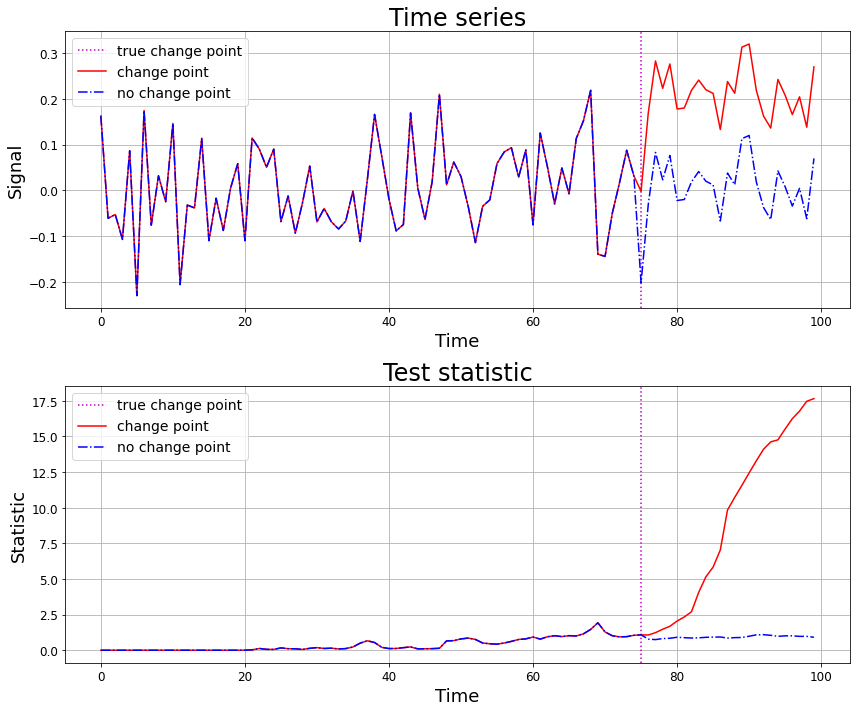

In [4]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.axvline(tau, c='m', ls=':', label='true change point')
plt.plot(Y, 'r', label='change point')
plt.plot(X, 'b-.', label='no change point')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=0, fontsize=14)
plt.title(label='Time series', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Signal', fontsize=18)
plt.grid()


plt.subplot(2, 1, 2)
plt.title(label='Test statistic', fontsize=24)

plt.axvline(tau, c='m', ls=':', label='true change point')

plt.plot(np.arange(n), S_Y, 'r-', label='change point')
plt.plot(np.arange(n), S_X, 'b-.', label='no change point')

plt.legend(loc=0, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Statistic', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('images/illustration.png')

### Mean shift detection

In [5]:
np.random.seed(1)

# Number of observations
n = 150
# True change point
tau = 75

# Shift size
mu = 0.2

# Standard deviation of the observations
sigma = 0.1

# Generate a Gaussian sequence of observations
X = sigma * randn(n)
X[tau:] += mu

In [6]:
# Apply the change point detection procedure
p = 2
S_lin, _ = compute_test_stat_linear(X, p)
S_nn, _ = compute_test_stat_nn(X, n_epochs=50)

In [7]:
# Apply the fast change point detection procedure
p = 2
S_ftal_hermite, _ = compute_test_stat_ftal(X, p, beta=0.01, design="hermite")

In [8]:
S_kliep, _ = compute_test_stat_kliep(X, window_size=20, sigma=0.2)

In [9]:
S_mmd, _ = compute_test_stat_mmd(X, window_size=20, sigma=0.5)  

In [10]:
S_mmd_norm = S_mmd / 4
threshold_mmd_norm = threshold_mmd_20_50 / 4

In [11]:
S_cusum = compute_cusum(X)  

In [12]:
S_cusum_norm = S_cusum * 10
threshold_cusum_norm = threshold_cusum * 10

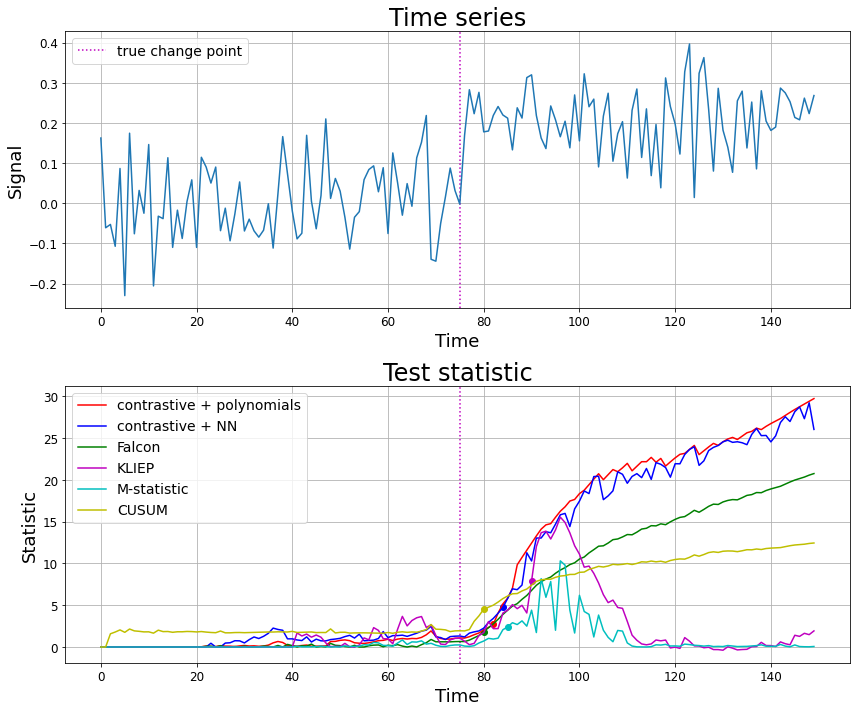

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.axvline(tau, c='m', ls=':', label='true change point')
plt.plot(X)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=0, fontsize=14)
plt.title(label='Time series', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Signal', fontsize=18)
plt.grid()

plt.subplot(2, 1, 2)
plt.title(label='Test statistic', fontsize=24)

imin_lin, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_lin, S_lin <= threshold_p_2_poly))
imin_nn, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_nn, S_nn <= threshold_nn))
imin_ftal_hermite, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_ftal_hermite,\
                                                                    S_ftal_hermite <= threshold_hermite_p_2_001))
imin_kliep, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_kliep, S_kliep <=  threshold_kliep_20))
imin_mmd, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_mmd_norm, S_mmd_norm <= threshold_mmd_norm))
imin_cusum, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_cusum_norm, S_cusum_norm <= threshold_cusum_norm))

plt.axvline(tau, c='m', ls=':')

plt.plot([imin_lin], S_lin[imin_lin], 'o', c='r')
plt.plot([imin_nn], S_nn[imin_nn], 'o', c='b')
plt.plot([imin_ftal_hermite], S_ftal_hermite[imin_ftal_hermite], 'o', c='g')
plt.plot([imin_kliep], S_kliep[imin_kliep], 'o', c='m')
plt.plot([imin_mmd], S_mmd_norm[imin_mmd], 'o', c='c')
plt.plot([imin_cusum], S_cusum_norm[imin_cusum], 'o', c='y')

plt.plot(np.arange(n), S_lin, 'r-', label='contrastive + polynomials')
plt.plot(np.arange(n), S_nn, 'b-', label='contrastive + NN')
plt.plot(np.arange(n), S_ftal_hermite, 'g-', label='Falcon')
plt.plot(np.arange(n), S_kliep, 'm-', label='KLIEP')
plt.plot(np.arange(n), S_mmd_norm, 'c-', label='M-statistic')
plt.plot(np.arange(n), S_cusum_norm, 'y-', label='CUSUM')

plt.legend(loc=0, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Statistic', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('images/synthetic_dataset1.png')

### Variance change detection

In [15]:
# Number of observations
n = 150
# True change point
tau = 75

# Standard deviation before the change point
sigma_1 = 0.1
# Standard deviation after the change point
sigma_2 = 0.3

# Generate a Gaussian sequence of observations
np.random.seed(2)
X = randn(n)
X[:tau] *= sigma_1
X[tau:] *= sigma_2

In [16]:
# Apply the change point detection procedure
p = 3
S_lin, _ = compute_test_stat_linear(X, p)
S_nn, _ = compute_test_stat_nn(X, n_epochs=50)

In [17]:
# Apply the fast change point detection procedure
p = 3
S_ftal_hermite, _ = compute_test_stat_ftal(X, p, beta=0.01, design="hermite")

In [18]:
S_kliep, _ = compute_test_stat_kliep(X, window_size=20, sigma=0.33)
S_mmd, _ = compute_test_stat_mmd(X, window_size=20, sigma=0.1)    

In [19]:
S_mmd_norm = S_mmd / 4
threshold_mmd_norm = threshold_mmd_20_10 / 4

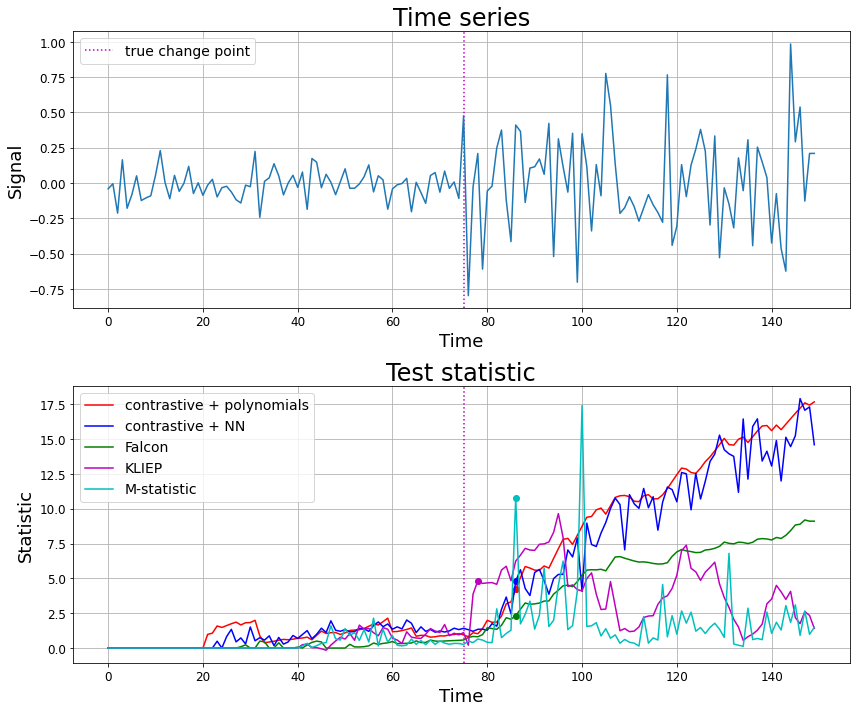

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.axvline(tau, c='m', ls=':', label='true change point')
plt.plot(X)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=0, fontsize=14)
plt.title(label='Time series', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Signal', fontsize=18)
plt.grid()

plt.subplot(2, 1, 2)
plt.title(label='Test statistic', fontsize=24)

imin_lin, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_lin, S_lin <= threshold_p_3_poly))
imin_nn, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_nn, S_nn <= threshold_nn))
imin_ftal_hermite, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_ftal_hermite,\
                                                                    S_ftal_hermite <= threshold_hermite_p_3_001))
imin_kliep, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_kliep, S_kliep <=  threshold_kliep_33))
imin_mmd, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_mmd_norm, S_mmd_norm <= threshold_mmd_norm))

plt.axvline(tau, c='m', ls=':')

plt.plot([imin_lin], S_lin[imin_lin], 'o', c='r')
plt.plot([imin_nn], S_nn[imin_nn], 'o', c='b')
plt.plot([imin_ftal_hermite], S_ftal_hermite[imin_ftal_hermite], 'o', c='g')
plt.plot([imin_kliep], S_kliep[imin_kliep], 'o', c='m')
plt.plot([imin_mmd], S_mmd_norm[imin_mmd], 'o', c='c')

plt.plot(np.arange(n), S_lin, 'r-', label='contrastive + polynomials')
plt.plot(np.arange(n), S_nn, 'b-', label='contrastive + NN')
plt.plot(np.arange(n), S_ftal_hermite, 'g-', label='Falcon')
plt.plot(np.arange(n), S_kliep, 'm-', label='KLIEP')
plt.plot(np.arange(n), S_mmd_norm, 'c-', label='M-statistic')

plt.legend(loc=0, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Statistic', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('images/synthetic_dataset2.png')

### Distribution change detection

In [22]:
# Number of observations
n = 200
# True change point
tau = 75

# Standard deviation
sigma = 0.1

np.random.seed(1)

#--------------------------------------------------------
# Pre-change distributions
#--------------------------------------------------------

### Gaussian N(0, sigma^2)
#Y = sigma * randn(tau)

### Uniform on [-sigma sqrt(3), sigma sqrt(3)]
Y = 2 * np.sqrt(3) * sigma * (np.random.rand(tau) - 0.5)

### Laplace distribution
#Y = sigma * laplace(size = n - tau) / np.sqrt(2)


#--------------------------------------------------------
# Post-change distributions
#--------------------------------------------------------

### Beta distribution
#alpha = 100
#beta = 100
#Z = sigma * (np.random.beta(alpha, beta, size=n-tau) - 0.5) \
#* (alpha + beta) * np.sqrt((alpha + beta + 1) / alpha / beta)

### Uniform on [-sigma sqrt(3), sigma sqrt(3)]
#Z = 2 * np.sqrt(3) * sigma * (np.random.rand(n - tau) - 0.5)

### Laplace distribution
#Z = sigma * laplace(size = n - tau) / np.sqrt(2)

### Gaussian N(0, sigma^2)
Z = sigma * randn(n - tau)

### Student's t-distribution with df degrees of freedom
#df = 3
#Z = sigma * np.random.standard_t(df, size=n-tau) / np.sqrt(df / (df - 2))

# Sequence of observations
X = np.append(Y, Z)
print(X.shape)

(200,)


In [23]:
# Apply the change point detection procedure
p = 6
S_lin, _ = compute_test_stat_linear(X, p)
S_nn, _ = compute_test_stat_nn(X, n_epochs=50)

In [24]:
S_kliep, _ = compute_test_stat_kliep(X, window_size=50, sigma=0.50)
S_mmd, _ = compute_test_stat_mmd(X, window_size=50, sigma=0.50)

In [25]:
# Apply the fast change point detection procedure
p = 6
S_ftal_legendre, _ = compute_test_stat_ftal(X, p, beta=0.005, design='legendre')

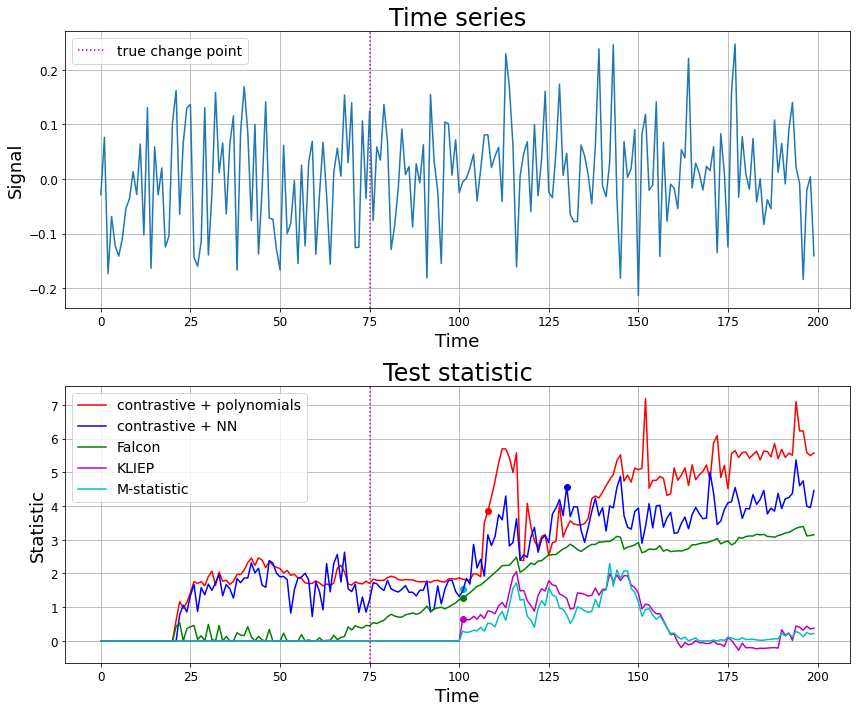

In [29]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.axvline(tau, c='m', ls=':', label='true change point')
plt.plot(X)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=0, fontsize=14)
plt.title(label='Time series', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Signal', fontsize=18)
plt.grid()

plt.subplot(2, 1, 2)
plt.title(label='Test statistic', fontsize=24)

imin_lin, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_lin, S_lin <= threshold_p_6_poly))
imin_nn, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_nn, S_nn <= threshold_nn))
imin_ftal_legendre, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_ftal_legendre,\
                                                                    S_ftal_legendre <= threshold_legendre_p_6_0005))
imin_kliep, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_kliep, S_kliep <=  threshold_kliep_50))
imin_mmd, _ = np.ma.flatnotmasked_edges(np.ma.masked_array(S_mmd, S_mmd <= threshold_mmd_50_50))

plt.axvline(tau, c='m', ls=':')

plt.plot([imin_lin], S_lin[imin_lin], 'o', c='r')
plt.plot([imin_nn], S_nn[imin_nn], 'o', c='b')
plt.plot([imin_ftal_legendre], S_ftal_legendre[imin_ftal_legendre], 'o', c='g')
plt.plot([imin_kliep], S_kliep[imin_kliep], 'o', c='m')
plt.plot([imin_mmd], S_mmd_norm[imin_mmd], 'o', c='c')

plt.plot(np.arange(n), S_lin, 'r-', label='contrastive + polynomials')
plt.plot(np.arange(n), S_nn, 'b-', label='contrastive + NN')
plt.plot(np.arange(n), S_ftal_legendre, 'g-', label='Falcon')
plt.plot(np.arange(n), S_kliep, 'm-', label='KLIEP')
plt.plot(np.arange(n), S_mmd, 'c-', label='M-statistic')


plt.legend(loc=0, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Statistic', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('images/synthetic_dataset3.png')